<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных" data-toc-modified-id="Изучение-общей-информации-о-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации о данных</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение</a></span></li></ul></li><li><span><a href="#Анализ-предсказаний" data-toc-modified-id="Анализ-предсказаний-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ предсказаний</a></span><ul class="toc-item"><li><span><a href="#Рассчёт-достаточного-объёма-сырья-для-безубыточной-разработки-новой-скважины" data-toc-modified-id="Рассчёт-достаточного-объёма-сырья-для-безубыточной-разработки-новой-скважины-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Рассчёт достаточного объёма сырья для безубыточной разработки новой скважины</a></span></li><li><span><a href="#Функция-рассчёта-прибыли-по-выбранным-скважинам-и-предсказаниям-модели" data-toc-modified-id="Функция-рассчёта-прибыли-по-выбранным-скважинам-и-предсказаниям-модели-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция рассчёта прибыли по выбранным скважинам и предсказаниям модели</a></span></li><li><span><a href="#Рассчёт-рисков-и-прибыли-для-каждого-региона" data-toc-modified-id="Рассчёт-рисков-и-прибыли-для-каждого-региона-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Рассчёт рисков и прибыли для каждого региона</a></span></li></ul></li><li><span><a href="#Общий-вывод-по-проделанной-работе" data-toc-modified-id="Общий-вывод-по-проделанной-работе-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод по проделанной работе</a></span></li></ul></div>

# Модель предсказания прибыли скважин; анализ возможной прибыли и рисков

Перед нами данные о пробах нефти в трёх регионах с характеристиками для каждой скважины в регионе. Данные предоставлены в трёх `csv` файлах. Наша задача - обучить модель для определения региона, где добыча принесёт наибольшую прибыль и спрогнозировать прибыль самого успешного региона.

Исследование поделено на четыре основные части:

- 1) Изучение общей информации о данных
- 2) Обучение модели:
    - Разделение данных на выборки
    - Обучение
- 3) Анализ предсказаний
    - Рассчёт достаточного объёма сырья для безубыточной разработки новой скважины.
    - Рассчёт прибыли и рисков для каждого региона
- 4) Общий вывод по проделанной работе

**Описание данных:**
Нам даны данные по трём регионам.
- `geo_data_0.csv` - Данные для региона 0
- `geo_data_1.csv` - Данные для региона 1
- `geo_data_2.csv` - Данные для региона 2

Каждый объект в наборе данных — действующая нефтяная скважина в определённом регионе
- `id` — уникальный идентификатор скважины
- `f0, f1, f2` — три признака точек
- `product` — объём запасов в скважине (тыс. баррелей)

## Изучение общей информации о данных

Импортируем модули.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ignore warnings
warnings.simplefilter('ignore')

# RandomState
state = np.random.RandomState(12345)

Запишем константы, данные нам от бизнеса.

In [2]:
BARREL_REVENUE = 450_000 # Выручка за 1 единицу "product" (тысячу баррелей) в рублях
POTENTIAL_WELLS = 500 # количество исследуемых скважин
TOP_WELLS = 200 # количество скважин, выбранных для разработки
REGION_BUDGET = 10_000_000_000 # бюджет, выделенный для разработки скважин одного региона

Импортируем данные.

In [3]:
df0 = pd.read_csv('datasets/geo_data_0.csv', sep=',')

df1 = pd.read_csv('datasets/geo_data_1.csv', sep=',')

df2 = pd.read_csv('datasets/geo_data_2.csv', sep=',')

Выведем первые 5 строк датафреймов и основную информацию о них.

In [4]:
data = [df0, df1, df2]

for df in data:
    display(df.head())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [5]:
df0[df0['id'].isin(df0.duplicated(subset="id"))]

,id,f0,f1,f2,product


In [6]:
for df in data:
    df.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Nul

В данных отсутствуют пропуски. Столбец `id` в будущем нужно будет исключить из признаков, он не нужен для обучения модели.

In [7]:
for df in data:
    display(df.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Внутренние метрики из `geo_data_1.csv` сильно отличаются от других регионов, а средний запас нефти ниже.

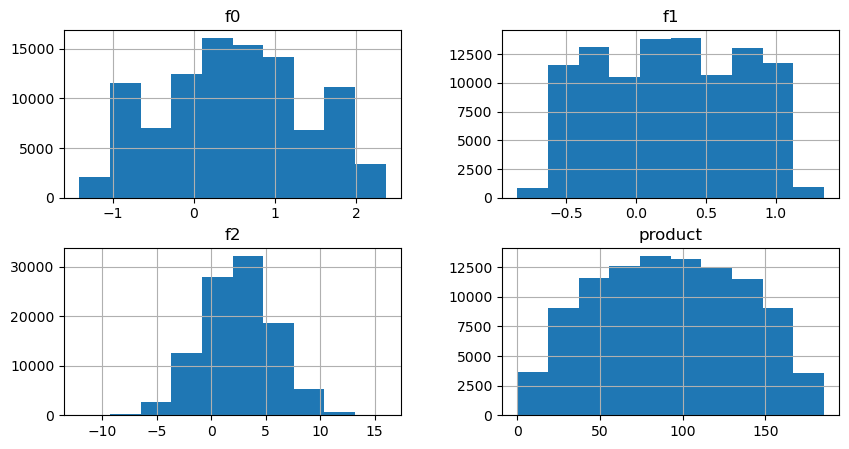

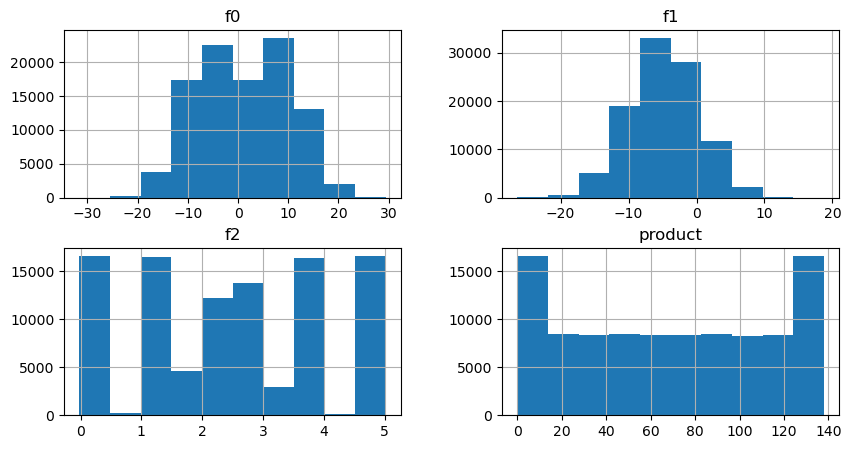

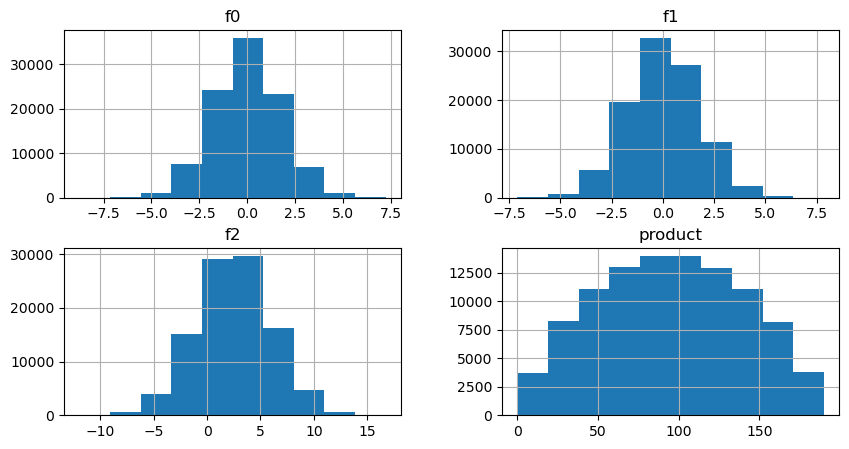

In [8]:
# create hist for each column
for df in data:
    df.hist(figsize=(10, 5));

Распределение значений объёмов нефти в скважинах из `geo_data_1.csv` также сильно отличается от других регионов.

In [9]:
# print correlation matrix
for df in data:
    display(
        df.corr()
        .round(2)
        .style.background_gradient(cmap ='seismic')
        .set_properties(**{'font-size': '10px'})
           )

,f0,f1,f2,product
f0,1.000000,-0.440000,-0.000000,0.140000
f1,-0.440000,1.000000,0.000000,-0.190000
f2,-0.000000,0.000000,1.000000,0.480000
product,0.140000,-0.190000,0.480000,1.000000


,f0,f1,f2,product
f0,1.000000,0.180000,-0.000000,-0.030000
f1,0.180000,1.000000,-0.000000,-0.010000
f2,-0.000000,-0.000000,1.000000,1.000000
product,-0.030000,-0.010000,1.000000,1.000000


,f0,f1,f2,product
f0,1.000000,0.000000,-0.000000,-0.000000
f1,0.000000,1.000000,0.000000,-0.000000
f2,-0.000000,0.000000,1.000000,0.450000
product,-0.000000,-0.000000,0.450000,1.000000


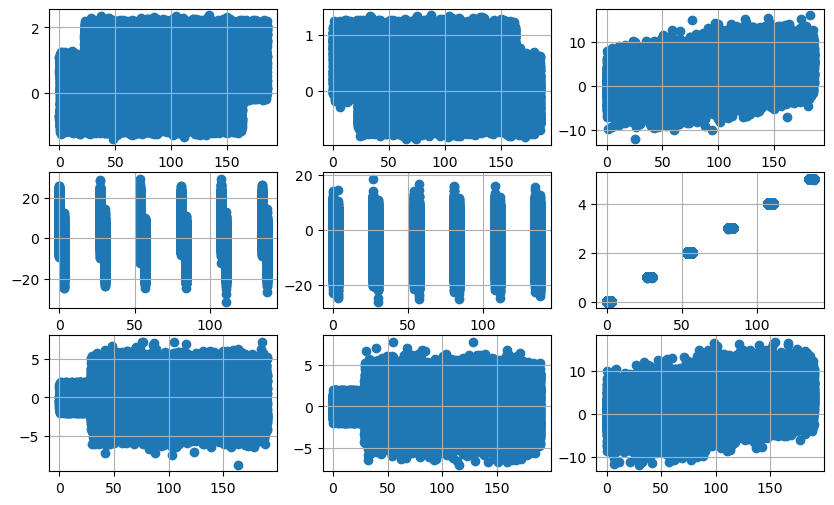

In [10]:
plt.rcParams["figure.figsize"] = (10,6)
xy=1
cols_to_check = ['f0', 'f1', 'f2']
for i in range(len(data)):
    for j in range(len(cols_to_check)):
        plt.subplot(len(data), len(cols_to_check), xy)
        x = data[i]['product']
        y = data[i][cols_to_check[j]]
        plt.scatter(x,y)
        plt.grid()
        xy += 1

Аномально высокая корреляция в `geo_data_1.csv` между внутренней метрикой `f2` и `product`, когда в других данных эта корреляция значительно меньше. В целом данные `geo_data_1` сильно отличаются от остальных.

**Вывод:** Проанализировав общую информацию мы установили:
- Ошибки оформления и пропуски в данных отсутствуют. Данные не нуждаются в предобработке. Столбец `id` при обучении модели нужно будет исключить.
- Данные из `geo_data_1.csv` значительно отличаются от данных из остальных источников.
- В данных `geo_data_1.csv` присутствует высокая корреляция между метрикой `f2` и целевым признаком `product`.

Перед тем как приступим к обучению, разделим данные на обучающую и валидационную выборки, затем обучим модели для каждого региона и проверим их точность на валидационых выборках. После этого проведём рассчёты некоторых метрик и, основываясь на предсказаниях моделей, найдём операционные прибыли для каждого региона.

## Обучение модели

Перед нами стоит задача регрессии и для её выполнения будем использовать модель `LinearRegression` из модуля `linear_model`, библиотеки `sklearn`. Это простая и предсказуемая линейная модель (она выводит и в последствии подчиняется одной формуле для нахождения максимально близкого к реальным значеням предсказания). Для проверки качества модели будем пользоваться метрикой `RMSE` - корнем из средней квадратичной ошибки (средняя разница между прогнозами и фактическими значениями).

### Разделение данных на выборки

Выделим признаки (исключив `id`) и целевой признак для каждого датасета. Разобьём имеющиеся данные на обучающие (75%) и валидационные (25%) выборки и затем стандартизируем признаки.

In [11]:
features = {} # dict of features
target = {} # dict of target

for i in range(len(data)):
    features[i] = data[i].drop(['id', 'product'], axis=1)
    target[i] = data[i]['product']

In [12]:
size=0.25 # test subset size variable
features_train = {}
features_valid = {}
target_train = {}
target_valid = {}

# split data into train and validation subsets
for i in range(len(data)):
    features_train[i], features_valid[i], target_train[i], target_valid[i] = \
    train_test_split(
        features[i], target[i],
        test_size=size,
        random_state=state
    )

### Обучение

Обучим модели и проверим, какие средние значения объёмов нефти они предсказывают. Для контроля качества модели также выведем метрику RMSE.

In [13]:
# print rmse
def metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred) ** 0.5
    prod_mean = y_pred.mean()
    print(f"Средний запас предсказанного сырья = {prod_mean}, RMSE модели = {rmse}")

In [14]:
predicts = {} # dict of predicts

for i in range(len(data)):
    mod = LinearRegression().fit(features_train[i], target_train[i])
    predicts[i] = pd.Series(mod.predict(features_valid[i]))
    print('Показатели для региона', i)
    metrics(target_valid[i], predicts[i])
    print()

Показатели для региона 0
Средний запас предсказанного сырья = 92.59256778438035, RMSE модели = 37.5794217150813

Показатели для региона 1
Средний запас предсказанного сырья = 68.76995145799754, RMSE модели = 0.8897367737680651

Показатели для региона 2
Средний запас предсказанного сырья = 95.087528122523, RMSE модели = 39.958042459521614



`RMSE` региона `geo_data_1` значительно ниже, чем у остальных регионов. Такой показатель метрики может служить индикатором того, что данные собраны некорректно. В наших данных целевой признак слишком линейно зависим от одного из признаков. Возможно в данных ошибка, но и возможно, что конкретно в этом регионе действительно существует прямая связь между `f2` и объемом скважины. Для остальных регионов значения `RMSE` очень высоки.

**Вывод:** Линейная регрессия хорошо справляется с предсказанием количественных значений и отличается хорошей интерпретируемостью.

Нами были обучены модели `model0`, `model1` и `model2` для каждого из регионов, соответственно.

## Анализ предсказаний

Объёмы запасов в скважинах даны в тысячах баррелей. 

- Один баррель приносит 450 рублей дохода. 
- При разведке региона исследуют 500 потенциальных скважин. 
- На разработку 200 лучших скважин в регионе выделяется 10 млрд. 

Рассчёт бюджета, требуемуго для разработки каждой скважины, рассчитывается индивидуально и учитывает в себе множество факторов, таких как глубина бассейна, твёрдость почвы, сложность доставки оборудования и др, но мы можем усреднить этот показатель и предположить, что на каждую скважину выделяется одна и та же сумма.

### Рассчёт достаточного объёма сырья для безубыточной разработки новой скважины

Проведём рассчёты некоторых бизнес-метрик и рассчитаем объём сырья, необходимый для безубыточной разработки новой скважины.

In [15]:
oil_well_budget = round(REGION_BUDGET/TOP_WELLS) # Бюджет, выделяемый на одну скважину в рублях
required_volume = round(oil_well_budget/BARREL_REVENUE) # требуемый объем сырья для безубыточной разработки в тыс. баррелей

print(f"Средний бюджет на разработку одной скважины равен {int(oil_well_budget/1000000)} млн. рублей.")
print(f"Объём нефти, требуемый для окупаемости скважины, равен {required_volume} тысяч баррелей")

Средний бюджет на разработку одной скважины равен 50 млн. рублей.
Объём нефти, требуемый для окупаемости скважины, равен 111 тысяч баррелей


Сравним требуемый объём сырья со средним запасом в каждом регионе. 

In [16]:
for i in range(len(data)):
    mean = data[i]['product'].mean()
    if mean > required_volume:
        print(f"Средний запас сырья в {i} регионе равен {round(mean)}, что больше требуемого для окупаемости.")
    elif mean == required_volume:
        print(f"Средний запас сырья в {i} регионе равен {round(mean)} и равен требуемому для окупаемости.")
    else:
        print(f"Средний запас сырья в {i} регионе равен {round(mean)}, что меньше требуемого для окупаемости.")

Средний запас сырья в 0 регионе равен 93, что меньше требуемого для окупаемости.
Средний запас сырья в 1 регионе равен 69, что меньше требуемого для окупаемости.
Средний запас сырья в 2 регионе равен 95, что меньше требуемого для окупаемости.


**Вывод:** Объём нефти, требуемый для безубыточной разработки скважины, равен 111.1 тысяч баррелей. Именно это значение должнен превышать объём запасов нефти, чтобы разработка скважины окупилась. Но ни в одном регионе среднее значение `product`не доходит до требуемого.

### Функция рассчёта прибыли по выбранным скважинам и предсказаниям модели

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели. На вход функции даётся список значений `product`, предсказанных моделью и список известных нам реальных значений. Функция возвращает спрогнозированную операционную прибыль, рассчитанную по выбранным 200 лучшим скважинам и фактическую прибыль по ним же.

In [17]:
def calc_profit(subsample):
    
    # create temporary dataframe
    temp = pd.DataFrame(subsample, columns=['predicted'])
    
    # reset target index
    target = target_valid[i].reset_index(drop='True')

    # add true 'product' column
    temp['target'] = target[subsample.index]

    # sort predicted 'product' by descending and leave only first 'TOP_WELLS'
    temp = temp.sort_values(by='predicted', ascending=False)[:TOP_WELLS]
    
    # calculate sum of top 200 predicted 'product' values
    sum_p_prod = sum(temp['predicted'])

    # calculate sum of true 'product' values
    sum_r_prod = sum(temp['target'])

    # calculate predicted profit for top 200 wells
    p_profit = sum_p_prod * BARREL_REVENUE - TOP_WELLS * oil_well_budget
    
    # calculate real profit
    r_profit = sum_r_prod * BARREL_REVENUE - TOP_WELLS * oil_well_budget
    
    return p_profit, r_profit

### Рассчёт рисков и прибыли для каждого региона

Мы знаем, что при разведке региона исследуют 500 точек, из которых выбирают 200 лучших для разработки. С помощью техники `bootstrap` для каждого региона симулируем 1000 сценариев разведки и посчитаем для каждого сценария операционную прибыль.

In [18]:
bootstrap_samples = 1000 # number of iterations
pred_profit = {} # dict of predicted profit
real_profit = {} # dict for real profit

for i in range(len(data)):
    values_p = []
    values_r = []
    for j in range(bootstrap_samples):
        # take sample of region wells features, number of samples = potential_wells
        subsample = predicts[i].sample(n=POTENTIAL_WELLS, replace=True, random_state=state)
        # calculate predicted and real profit
        p_profit, r_profit = calc_profit(subsample)
        values_p.append(p_profit)
        values_r.append(r_profit)
    # save results
    pred_profit[i] = pd.Series(values_p)
    real_profit[i] = pd.Series(values_r)

Посмотрим, как распределена прибыль, посчитанная бутстрэппингом.

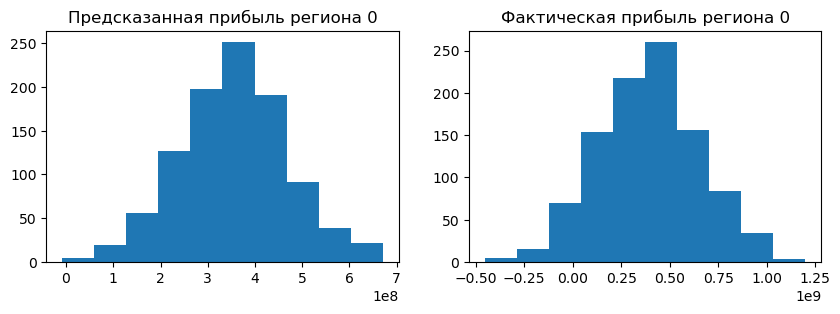

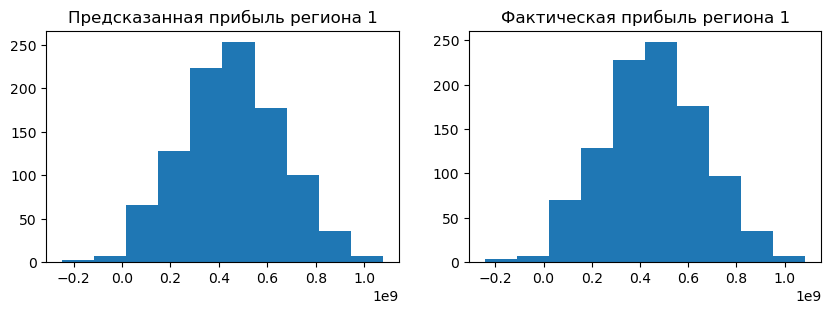

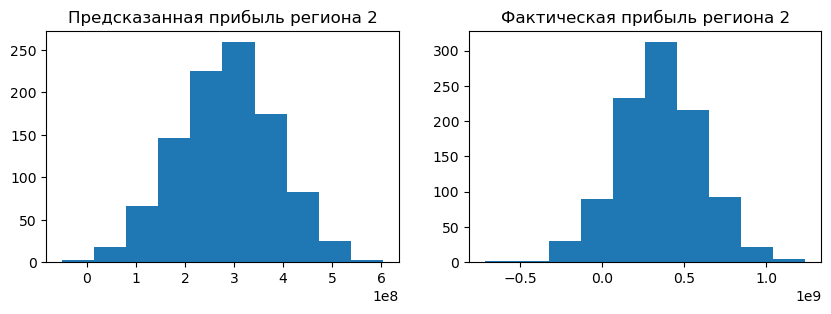

In [19]:
for i in range(len(data)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    ax1.hist(pred_profit[i])
    ax1.set_title(f"Предсказанная прибыль региона {i}")
    ax2.hist(real_profit[i])
    ax2.set_title(f"Фактическая прибыль региона {i}")

Операционные прибыли распределились нормально. Найдём для предсказанной прибыли среднее по выборке, 95%-й доверительный интервал (значения, между которыми с 95%-й вероятностью находится истинное среднее) и риск убытков.

In [20]:
for i in range(len(data)):
    pred_mean = round(pred_profit[i].mean())
    true_mean = round(real_profit[i].mean())
    lower = round(pred_profit[i].quantile(0.025))
    upper = round(pred_profit[i].quantile(0.975))
    pred_risk = round((pred_profit[i] < 0).sum()/(len(pred_profit[i]))*100, 1)
    true_risk = round((real_profit[i] < 0).sum()/(len(real_profit[i]))*100, 1)
    print(f"Средняя предсказанная операционная прибыль по региону {i} равна {pred_mean}")
    print(f"Средняя фактическая операционная прибыль по региону {i} равна {true_mean}")
    print(f"95%-й доверительный интервал прибыли:{lower} - {upper}")
    print(f"Предсказанный риск убытков составляет {pred_risk}%")
    print(f"Фактический риск убытков составляет {true_risk}%")
    print()

Средняя предсказанная операционная прибыль по региону 0 равна 354764300
Средняя фактическая операционная прибыль по региону 0 равна 394284411
95%-й доверительный интервал прибыли:129174860 - 589962592
Предсказанный риск убытков составляет 0.1%
Фактический риск убытков составляет 6.1%

Средняя предсказанная операционная прибыль по региону 1 равна 452735534
Средняя фактическая операционная прибыль по региону 1 равна 454736359
95%-й доверительный интервал прибыли:59256641 - 857261830
Предсказанный риск убытков составляет 0.7%
Фактический риск убытков составляет 0.7%

Средняя предсказанная операционная прибыль по региону 2 равна 285282237
Средняя фактическая операционная прибыль по региону 2 равна 353664098
95%-й доверительный интервал прибыли:92596349 - 478674368
Предсказанный риск убытков составляет 0.2%
Фактический риск убытков составляет 7.6%



**Вывод:** Средняя предсказанная операционная прибыль по 1 региону ближе остальных к фактической. Это связано с тем, что модель хорошо обучилась на данных и хорошо предсказывает объёмы нефти в скважинах. Это позволяет алгоритму точнее отбирать лучшие скважины в регионе для последующей их разработки. Если такой результат получился не под влиянием искаженных данных, то за счёт предсказаний, выбрав для разведки 1 регион, можно будет добиться самой высокой прибыли с минимальными рисками. Для других регионов предсказания модели недотаточно точны, чтобы соответствовать условию, что вероятность убытков должна быть меньше 2.5%.

## Общий вывод по проделанной работе

Рассмотрев с данные по несколькоим регионам, мы выделили необычную корреляцию между метрикой `f2` и интересующими нас значениями `product` (объёмами нефти в скважинах) у региона `1`.

С задачей прогнозирования численных значений целевого признака по нескольким признакам хорошо справляется линейная регрессия. Важным её преимуществом является также то, что результаты её предсказаний хорошо интерпретируются. 

Обучив для каждого региона модель `LinearRegression` и проверив их качество метрикой `RMSE` (среднеквадратичная ошибка), мы пришли к выводу, что модель лучше всего обучилась на данных по региону `1`.

Затем были произведены рассчёты следующих показателей:
- `oil_well_budget` = 50 млн. рублей - Бюджет, выделяемый на одну скважину в рублях
- `required_volume` = 111 тыс. баррелей - объем сырья, требуемый для безубыточной разработки

Для каждого региона тысячу раз из 500 случайно выбранных скважин с помощью предсказаний модели были отобраны 200 скважин с самым высоким предсказанным значением. Для каждой выборки были рассчитаны и сохранены предсказанная и фактическая операционные прибыли. Были рассчитаны средние значения операционной прибыли, интервалы, в которых находится реальные средние значения и риски убытков в процентах. Затем, путём сравнения данных по предсказанной и фактической прибыли был сделан вывод, что применение хорошо обученной модели позволяет:
- 1) Более точно отобрать лучшие скважины в регионе
- 2) Максимально точно спрогнозировать прибыль
- 3) Минимализировать риск убытков

После сравнения данных был сделан вывод, что для разработки скважин следует выбрать `1` регион, так прогнозируемая операционная прибыль по нему выше, чем по остальным регионам, риски убытков минимальны, а предсказания модели достаточно точны для дальнейшего её применения.

Применение машинного обучения для прогнозирования объемов нефти в нефтяных скважинах может значительно повысить эффективность добычи нефти, что приведет к снижению затрат и увеличению прибыли компаний, работающих в этом секторе. Несмотря на то, что некоторые проблемы, такие как, например, потребность в высокоточных данных, сохраняются, преимущества этого подхода очевидны.